In [25]:
import numpy as np
import glob                 # return all file paths that match a specific pattern
import os                   # to interact with the operating system
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
files_demean = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/timeseries/demeaned/*.npy')))
files_raw = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy'))
files_ensemble_mean = sorted(glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/ensemble*.npy'))

In [34]:
files_demean

['/home/innag3580/phase1_CONDA/timeseries/demeaned/OSNAPeast_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/OSNAPwest_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/bsf_min_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/maxi_dens_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/maxi_dept_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/rapi_dens_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/rapi_dept_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/spgy_dens_demeaned_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/demeaned/spgy_dept_demeaned_series.npy']

In [37]:
vvel_series = [8,12,13,16,27,45]
events = np.array([68,67,44,59,80,154])

time = np.arange(1850,1850+3012/12,1/12)
time_annual = np.arange(1850,1850+3012/12)

demeaned = np.zeros((len(time), len(files_demean)))
raw = np.zeros((len(time), len(files_raw)))
files_ensemble_mean = np.zeros((len(time), len(files_ensemble_mean)))

# Calculate the annual means by averaging the values in each row
def annual_from_monthly(signal):
    reshaped_data = signal.reshape(-1, 12)
    annual_means = np.mean(reshaped_data, axis=1)
    return annual_means

# find the corresponding number in the bsf list
def find_corresponding_bsf_number(vvel_number_to_find):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order_bsf.txt'), 'r') as file:
        bsf_list = file.readlines()
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    bsf_dict = {filename.split()[1]: int(filename.split()[0]) for filename in bsf_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  # Extract the filename part
            break
    bsf_filename = vvel_filename.replace("vvel", "bsf")
    return bsf_dict[bsf_filename], bsf_filename, 

In [61]:
i=5
vvel_number = vvel_series[i]

# find event
event = events[i]
bsf_number, bsf_filename = find_corresponding_bsf_number(vvel_number)

for i in range(len(files_demean)):
    demeaned[:,i] = np.load(files_demean[i])[:,vvel_number]
    raw[:,i] = np.load(files_raw[i])[:,vvel_number]

bsf_1281.001.nc


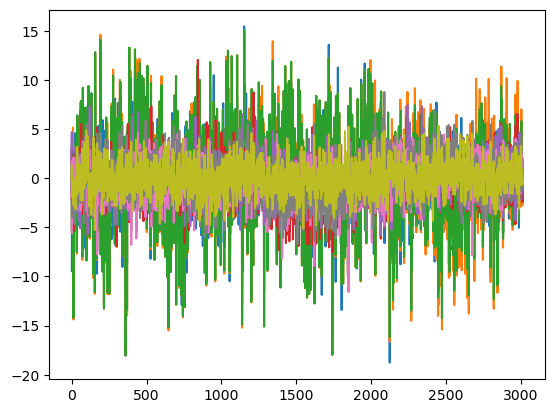

In [62]:
print(bsf_filename)
plt.plot(demeaned)

# Entire time series

In [63]:
# Create a DataFrame
df = pd.DataFrame(demeaned)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print('Correlation Matrix "demeaned":')
correlation_matrix.round(2)

Correlation Matrix "demeaned":


,0,1,2,3,4,5,6,7,8
0,1.00,0.84,0.88,-0.04,-0.04,0.01,0.00,-0.04,-0.07
1,0.84,1.00,0.98,-0.05,-0.05,-0.01,-0.02,-0.06,-0.08
2,0.88,0.98,1.00,-0.05,-0.05,-0.01,-0.01,-0.05,-0.08
3,-0.04,-0.05,-0.05,1.00,0.46,-0.01,0.03,0.50,0.37
4,-0.04,-0.05,-0.05,0.46,1.00,0.44,0.46,0.03,-0.11
5,0.01,-0.01,-0.01,-0.01,0.44,1.00,0.99,-0.14,-0.36
6,0.00,-0.02,-0.01,0.03,0.46,0.99,1.00,-0.12,-0.34
7,-0.04,-0.06,-0.05,0.50,0.03,-0.14,-0.12,1.00,0.78
8,-0.07,-0.08,-0.08,0.37,-0.11,-0.36,-0.34,0.78,1.00


In [64]:
# Create a DataFrame
df = pd.DataFrame(raw)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print('Correlation Matrix "raw":')
correlation_matrix.round(2)

Correlation Matrix "raw":


,0,1,2,3,4,5,6,7,8
0,1.00,0.95,0.96,-0.78,-0.73,-0.66,-0.68,-0.76,-0.67
1,0.95,1.00,1.00,-0.79,-0.71,-0.64,-0.66,-0.77,-0.66
2,0.96,1.00,1.00,-0.79,-0.71,-0.63,-0.66,-0.76,-0.66
3,-0.78,-0.79,-0.79,1.00,0.82,0.66,0.68,0.85,0.74
4,-0.73,-0.71,-0.71,0.82,1.00,0.82,0.83,0.70,0.53
5,-0.66,-0.64,-0.63,0.66,0.82,1.00,1.00,0.70,0.54
6,-0.68,-0.66,-0.66,0.68,0.83,1.00,1.00,0.72,0.56
7,-0.76,-0.77,-0.76,0.85,0.70,0.70,0.72,1.00,0.92
8,-0.67,-0.66,-0.66,0.74,0.53,0.54,0.56,0.92,1.00


# Including lags